### Importação das bibliotecas necessárias

Inserir aqui a descrição das bibliotecas utilizadas.

### Conhecendo o dataset

In [ ]:
!pip3 install pycaret

In [ ]:
import pandas as pd
import numpy as np

from pycaret.classification import *
from pycaret.datasets import get_data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Desafio Visagio/Dataset_Treino.csv')

In [ ]:
df.shape

(3738, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3738 entries, 0 to 3737
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Aluno                 3738 non-null   int64  
 1   Idade                    3738 non-null   int64  
 2   Tipo_escola              3738 non-null   object 
 3   Escolaridade             3738 non-null   object 
 4   Estado                   3738 non-null   object 
 5   Municipio                3727 non-null   object 
 6   Trabalhando              3738 non-null   object 
 7   Estudando                3733 non-null   object 
 8   Concluiu_EAD             3736 non-null   object 
 9   Aprender_EAD             3738 non-null   object 
 10  Recursos                 3734 non-null   object 
 11  Disponibilidade_Tutoria  3738 non-null   object 
 12  Disponibilidade_3_Meses  3738 non-null   object 
 13  Pessoas_Casa             3738 non-null   object 
 14  Renda_Familiar          

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,Recursos,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso
0,1,19,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,SIm e fiz totalmente pelo celular,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio/Tablet próprio/Inte...,Sim,Sim,7,Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),LinkedIn,Noite,15/09/2022,0.0,123,1
1,2,21,public,Cursando o 3º ano do Ensino Médio,RJ,Rio de Janeiro,Não,Não,Ainda não concluí um curso a distância,Eu prefiro cursos presenciais,Computador,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Junior Achievement,Manhã,15/09/2022,1.0,123,0
2,3,17,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,Nunca realizei um curso a distância,Muito eu tenho uma rotina definida para partic...,Celular próprio/Internet wifi,Sim,Sim,3,Até 1 salário mínimo (até R$1.100),Indicação de familiar,Manhã,15/09/2022,1.0,123,0
3,4,18,public,Ensino Médio concluído e não estudando,SP,Osasco,Não,Sim,Sim e fiz parcialmente pelo computador e parci...,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio/Tablet próprio/Inte...,Sim,Sim,5,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Noite,15/09/2022,3.0,123,0
4,5,19,public,Ensino Médio concluído e não estudando,RJ,Rio de Janeiro,Não,Não,Sim e fiz parcialmente pelo computador e parci...,Não sei dizer,Computador/Celular próprio/Tablet próprio/Inte...,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Divulgação do iFood,Já concluí,15/09/2022,0.0,123,0


### Tratamento de dados

#### Destrinchando a coluna Recursos

In [ ]:
df['Recursos'].value_counts()

Computador/Celular próprio/Internet wifi                                                                                             864
Computador/Celular próprio/Internet wifi/Internet 4G                                                                                 803
Celular próprio/Internet wifi                                                                                                        773
Celular próprio/Internet wifi/Internet 4G                                                                                            403
Celular próprio                                                                                                                      310
Computador/Celular próprio                                                                                                            96
Celular próprio/Internet 4G                                                                                                           77
Computador                               

In [ ]:
df['Recursos'].nunique()

54

In [ ]:
df['Recursos'].isnull().value_counts()

False    3734
True        4
Name: Recursos, dtype: int64

In [ ]:
df['Recursos'].fillna('Indefinido', inplace=True)

In [ ]:
recursos = []

for i in df['Recursos']:
  parte = i.split('/')
  if parte not in recursos:
    recursos.append(parte)

print(recursos)

[['Computador', 'Celular próprio', 'Tablet próprio', 'Internet wifi', 'Internet 4G'], ['Computador'], ['Celular próprio', 'Internet wifi'], ['Computador', 'Celular próprio'], ['Computador', 'Celular próprio', 'Internet wifi', 'Internet 4G'], ['Computador', 'Celular próprio', 'Internet wifi'], ['Computador', 'Celular próprio', 'Celular compartilhado com outro familiar', 'Tablet próprio', 'Internet wifi', 'Internet 4G'], ['Celular próprio', 'Internet wifi', 'Internet 4G'], ['Celular próprio', 'Tablet compartilhado', 'Internet wifi'], ['Computador', 'Internet wifi'], ['Celular compartilhado com outro familiar', 'Tablet próprio', 'Internet wifi'], ['Computador', 'Celular próprio', 'Celular compartilhado com outro familiar', 'Internet wifi', 'Internet 4G'], ['Computador', 'Celular próprio', 'Tablet próprio', 'Internet wifi'], ['Celular próprio'], ['Celular próprio', 'Internet 4G'], ['Celular próprio', 'Tablet próprio', 'Internet wifi'], ['Computador', 'Celular próprio', 'Internet 4G'], ['Ce

In [ ]:
recursos_unicos = set()

for lista in recursos:
  recursos_unicos.update(lista)

recursos_unicos = list(recursos_unicos)

print(recursos_unicos)

['Tablet próprio', 'Internet 4G', 'Indefinido', 'Tablet compartilhado', 'Celular compartilhado com outro familiar', 'Computador', 'Internet wifi', 'Celular próprio']


In [ ]:
for i in recursos_unicos:
  print(i)

Tablet próprio
Internet 4G
Indefinido
Tablet compartilhado
Celular compartilhado com outro familiar
Computador
Internet wifi
Celular próprio


In [ ]:
atributos = ['Tablet próprio', 'Internet wifi', 'Celular compartilhado com outro familiar', 'Internet 4G', 'Computador', 'Indefinido', 'Tablet compartilhado', 'Celular próprio']

for atributo in atributos:
  df[atributo] = df['Recursos'].apply(lambda x: 1 if atributo in x else 0)

df.head(10)

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,Recursos,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso,Tablet próprio,Internet wifi,Celular compartilhado com outro familiar,Internet 4G,Computador,Indefinido,Tablet compartilhado,Celular próprio
0,1,19,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,SIm e fiz totalmente pelo celular,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio/Tablet próprio/Inte...,Sim,Sim,7,Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),LinkedIn,Noite,15/09/2022,0.0,123,1,1,1,0,1,1,0,0,1
1,2,21,public,Cursando o 3º ano do Ensino Médio,RJ,Rio de Janeiro,Não,Não,Ainda não concluí um curso a distância,Eu prefiro cursos presenciais,Computador,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Junior Achievement,Manhã,15/09/2022,1.0,123,0,0,0,0,0,1,0,0,0
2,3,17,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,Nunca realizei um curso a distância,Muito eu tenho uma rotina definida para partic...,Celular próprio/Internet wifi,Sim,Sim,3,Até 1 salário mínimo (até R$1.100),Indicação de familiar,Manhã,15/09/2022,1.0,123,0,0,1,0,0,0,0,0,1
3,4,18,public,Ensino Médio concluído e não estudando,SP,Osasco,Não,Sim,Sim e fiz parcialmente pelo computador e parci...,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio/Tablet próprio/Inte...,Sim,Sim,5,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Noite,15/09/2022,3.0,123,0,1,1,0,1,1,0,0,1
4,5,19,public,Ensino Médio concluído e não estudando,RJ,Rio de Janeiro,Não,Não,Sim e fiz parcialmente pelo computador e parci...,Não sei dizer,Computador/Celular próprio/Tablet próprio/Inte...,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Divulgação do iFood,Já concluí,15/09/2022,0.0,123,0,1,1,0,1,1,0,0,1
5,6,19,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Sim,Sim,Sim e fiz parcialmente pelo computador e parci...,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio,Sim,Sim,2,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Outros,Já concluí,15/09/2022,82.0,123,0,0,0,0,0,1,0,0,1
6,10,22,public,Cursando o 3º ano do Ensino Médio,SP,Ribeirão Pires,Não,Sim,Sim e fiz totalmente pelo computador,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio/Internet wifi/Inter...,Sim,Sim,4,Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),Junior Achievement,Noite,15/09/2022,7.0,123,0,0,1,0,1,1,0,0,1
7,11,18,public,Cursando o 3º ano do Ensino Médio,SP,Cotia,Sim,Sim,SIm e fiz totalmente pelo celular,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio/Internet wifi,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Manhã,15/09/2022,18.0,123,0,0,1,0,0,1,0,0,1
8,12,18,public,Ensino Médio concluído e não estudando,SP,Mauá,Não,Não,SIm e fiz totalmente pelo celular,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio/Celular compartilha...,Sim,Sim,2,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Google,Já concluí,15/09/2022,0.0,123,0,1,1,1,1,1,0,0,1
9,13,18,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,SIm e fiz totalmente pelo celular,Não sei dizer,Celular próprio/Internet wifi/Internet 4G,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Noite,15/09/2022,0.0,123,1,0,1,0,1,0,0,0,1


In [ ]:
df.drop('Recursos', axis=1, inplace=True)

In [ ]:
df.columns

Index(['ID_Aluno', 'Idade', 'Tipo_escola', 'Escolaridade', 'Estado',
       'Municipio', 'Trabalhando', 'Estudando', 'Concluiu_EAD', 'Aprender_EAD',
       'Disponibilidade_Tutoria', 'Disponibilidade_3_Meses', 'Pessoas_Casa',
       'Renda_Familiar', 'Conheceu_PROA', 'Horario_Estudando',
       'Data_Inscrição', 'Dias_Espera_Aprovacao', 'Dias_Espera_Inicio',
       'Abandono_curso', 'Tablet próprio', 'Internet wifi',
       'Celular compartilhado com outro familiar', 'Internet 4G', 'Computador',
       'Indefinido', 'Tablet compartilhado', 'Celular próprio'],
      dtype='object')

#### Tratamento de dados nulos

In [ ]:
df.isnull().sum()

ID_Aluno                                     0
Idade                                        0
Tipo_escola                                  0
Escolaridade                                 0
Estado                                       0
Municipio                                   11
Trabalhando                                  0
Estudando                                    5
Concluiu_EAD                                 2
Aprender_EAD                                 0
Disponibilidade_Tutoria                      0
Disponibilidade_3_Meses                      0
Pessoas_Casa                                 0
Renda_Familiar                               0
Conheceu_PROA                                0
Horario_Estudando                            0
Data_Inscrição                               0
Dias_Espera_Aprovacao                        0
Dias_Espera_Inicio                           0
Abandono_curso                               0
Tablet próprio                               0
Internet wifi

In [ ]:
df = df.dropna()

### Pré-processamento

In [ ]:
df_features = df.drop('ID_Aluno', axis=1)

for column in df_features.columns:
    unique_values = df_features[column].unique()
    print(f"Valores únicos na coluna '{column}': \n")
    for valor in unique_values:
        print(valor)
    print('\n')

Valores únicos na coluna 'Idade': 

19
21
17
18
22
20
23
16
24


Valores únicos na coluna 'Tipo_escola': 

public
scholarship


Valores únicos na coluna 'Escolaridade': 

Cursando o 3º ano do Ensino Médio
Ensino Médio concluído e não estudando
Cursando o Ensino Superior
Ensino Superior concluído
Ensino Médio concluído


Valores únicos na coluna 'Estado': 

SP
RJ
SC
RS


Valores únicos na coluna 'Municipio': 

São Paulo
Rio de Janeiro
Osasco
Ribeirão Pires
Cotia
Mauá
Taboão da Serra
Jandira
Itaboraí
Rio Grande da Serra
São Gonçalo
Embu-Guaçu
Carapicuíba
Gaspar
Miracema
Guarulhos
Duque de Caxias
Piraí
Nova Iguaçu
Barra Mansa
Itapecerica da Serra
São José dos Campos
Diadema
Seropédica
Belford Roxo
Niterói
São João de Meriti
Itaocara
Campos dos Goytacazes
São Caetano do Sul
Porto Alegre
Franco da Rocha
Queimados
Macaé
Cajamar
São José
Japeri
Campinas
Águas Mornas
Volta Redonda
Gravataí
Mogi das Cruzes
Barueri
Santos
Embu das Artes
Palhoça
São Bernardo do Campo
Cabo Frio
Florianópolis
Poá
P

#### Label Encoding em colunas de classificação binária

Colunas binárias: Tipo_escola, Trabalhando, Estudando, Disponibilidade_Tutoria, 'Disponibilidade_3_Meses'

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
binary_columns = ['Tipo_escola', 'Trabalhando', 'Estudando', 'Disponibilidade_Tutoria', 'Disponibilidade_3_Meses']

df[binary_columns] = df[binary_columns].apply(lambda column: le.fit_transform(column))

In [ ]:
df

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso,Tablet próprio,Internet wifi,Celular compartilhado com outro familiar,Internet 4G,Computador,Indefinido,Tablet compartilhado,Celular próprio
0,1,19,0,Cursando o 3º ano do Ensino Médio,SP,São Paulo,0,1,SIm e fiz totalmente pelo celular,Muito eu tenho uma rotina definida para partic...,1,1,7,Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),LinkedIn,Noite,15/09/2022,0.0,123,1,1,1,0,1,1,0,0,1
1,2,21,0,Cursando o 3º ano do Ensino Médio,RJ,Rio de Janeiro,0,0,Ainda não concluí um curso a distância,Eu prefiro cursos presenciais,1,1,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Junior Achievement,Manhã,15/09/2022,1.0,123,0,0,0,0,0,1,0,0,0
2,3,17,0,Cursando o 3º ano do Ensino Médio,SP,São Paulo,0,1,Nunca realizei um curso a distância,Muito eu tenho uma rotina definida para partic...,1,1,3,Até 1 salário mínimo (até R$1.100),Indicação de familiar,Manhã,15/09/2022,1.0,123,0,0,1,0,0,0,0,0,1
3,4,18,0,Ensino Médio concluído e não estudando,SP,Osasco,0,1,Sim e fiz parcialmente pelo computador e parci...,Muito eu tenho uma rotina definida para partic...,1,1,5,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Noite,15/09/2022,3.0,123,0,1,1,0,1,1,0,0,1
4,5,19,0,Ensino Médio concluído e não estudando,RJ,Rio de Janeiro,0,0,Sim e fiz parcialmente pelo computador e parci...,Não sei dizer,1,1,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Divulgação do iFood,Já concluí,15/09/2022,0.0,123,0,1,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,5351,17,0,Cursando o 3º ano do Ensino Médio,SP,São Paulo,0,1,SIm e fiz totalmente pelo celular,Muito eu tenho uma rotina definida para partic...,1,1,4,Até 1 salário mínimo (até R$1.100),Site de notícias,Noite,18/12/2022,0.0,29,1,0,0,0,0,0,0,0,1
3734,5353,19,0,Cursando o 3º ano do Ensino Médio,RJ,Queimados,0,0,Ainda não concluí um curso a distância,Muito eu tenho uma rotina definida para partic...,1,1,3,Até 1 salário mínimo (até R$1.100),Instagram,Já concluí,18/12/2022,0.0,29,0,0,1,0,0,0,0,0,1
3735,5354,18,0,Cursando o 3º ano do Ensino Médio,SP,São Paulo,0,0,Nunca realizei um curso a distância,Muito eu tenho uma rotina definida para partic...,1,1,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Já concluí,18/12/2022,0.0,29,1,1,1,0,1,0,0,0,1
3736,5355,18,0,Ensino Médio concluído e não estudando,SP,São Paulo,0,0,Nunca realizei um curso a distância,Não sei dizer,1,1,5,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Já concluí,18/12/2022,0.0,29,0,0,1,0,0,0,0,0,1


#### Label Encoding em colunas categóricas ordinais

In [ ]:
# ordinary_columns = ['Escolaridade']

# df[ordinary_columns] = df[ordinary_columns].apply(lambda column: le.fit_transform(column))

In [ ]:
# df

In [ ]:
renda_mapping = {
  'Até 1 salário mínimo (até R$1.100)': 1,
  'Entre 1 e 2 salários mínimos (R$1.100 – R$2.200)': 2,
  'Entre 2 e 3 salários mínimos (R$2.200 – R$3.300)': 3,
  'Entre 3 e 4 salários mínimos (R$3.300 – R$4.400)': 4,
  'Entre 4 e 5 salários mínimos (R$4.400 – R$5.500)': 5,
  'Mais que 5 salários mínimos (mais que R$5.500)': 6
}

escolaridade_mapping = {
  'Cursando o 3º ano do Ensino Médio': 0,
  'Ensino Médio concluído e não estudando': 1,
  'Cursando o Ensino Superior': 2,
  'Ensino Superior concluído': 3,
  'Ensino Médio concluído': 4
}

concluiu_ead_mapping = {
  'Nunca realizei um curso a distância': 0,
  'Ainda não concluí um curso a distância': 1,
  'Sim e fiz parcialmente pelo computador e parcialmente pelo celular': 2,
  'SIm e fiz totalmente pelo celular': 3,
  'Sim e fiz totalmente pelo computador': 4
}

aprender_ead_mapping = {
  'Quase nada': 0,
  'Não sei dizer': 1,
  'Eu prefiro cursos presenciais': 2,
  'Muito eu tenho uma rotina definida para participar de cursos a distância': 3
}

horario_estudando_mapping = {
  'Já concluí': 0,
  'Manhã': 1,
  'Tarde': 2,
  'Noite': 3,
  'Integral': 4
}

df['Escolaridade'] = df['Escolaridade'].map(escolaridade_mapping)
df['Renda_Familiar'] = df['Renda_Familiar'].map(renda_mapping)
df['Concluiu_EAD'] = df['Concluiu_EAD'].map(concluiu_ead_mapping)
df['Aprender_EAD'] = df['Aprender_EAD'].map(aprender_ead_mapping)
df['Horario_Estudando'] = df['Horario_Estudando'].map(horario_estudando_mapping)

In [ ]:
df

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso,Tablet próprio,Internet wifi,Celular compartilhado com outro familiar,Internet 4G,Computador,Indefinido,Tablet compartilhado,Celular próprio
0,1,19,0,0,SP,São Paulo,0,1,3,3,1,1,7,3,LinkedIn,3,15/09/2022,0.0,123,1,1,1,0,1,1,0,0,1
1,2,21,0,0,RJ,Rio de Janeiro,0,0,1,2,1,1,3,2,Junior Achievement,1,15/09/2022,1.0,123,0,0,0,0,0,1,0,0,0
2,3,17,0,0,SP,São Paulo,0,1,0,3,1,1,3,1,Indicação de familiar,1,15/09/2022,1.0,123,0,0,1,0,0,0,0,0,1
3,4,18,0,1,SP,Osasco,0,1,2,3,1,1,5,2,Instagram,3,15/09/2022,3.0,123,0,1,1,0,1,1,0,0,1
4,5,19,0,1,RJ,Rio de Janeiro,0,0,2,1,1,1,3,2,Divulgação do iFood,0,15/09/2022,0.0,123,0,1,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,5351,17,0,0,SP,São Paulo,0,1,3,3,1,1,4,1,Site de notícias,3,18/12/2022,0.0,29,1,0,0,0,0,0,0,0,1
3734,5353,19,0,0,RJ,Queimados,0,0,1,3,1,1,3,1,Instagram,0,18/12/2022,0.0,29,0,0,1,0,0,0,0,0,1
3735,5354,18,0,0,SP,São Paulo,0,0,0,3,1,1,3,2,Instagram,0,18/12/2022,0.0,29,1,1,1,0,1,0,0,0,1
3736,5355,18,0,1,SP,São Paulo,0,0,0,1,1,1,5,2,Instagram,0,18/12/2022,0.0,29,0,0,1,0,0,0,0,0,1


#### Target Encoding em colunas de classificação múltipla

In [ ]:
municipio_mean_encoded = df.groupby('Municipio')['Abandono_curso'].mean().reset_index()

municipio_mean_encoded.rename(columns={'Abandono_curso': 'Municipios_codificados'}, inplace=True)

df = df.merge(municipio_mean_encoded, on='Municipio', how='left')

In [ ]:
estado_mean_encoded = df.groupby('Estado')['Abandono_curso'].mean().reset_index()

estado_mean_encoded.rename(columns={'Abandono_curso': 'Estados_codificados'}, inplace=True)

df = df.merge(estado_mean_encoded, on='Estado', how='left')

In [ ]:
estado_mean_encoded = df.groupby('Conheceu_PROA')['Abandono_curso'].mean().reset_index()

estado_mean_encoded.rename(columns={'Abandono_curso': 'Conheceu_PROA_codificado'}, inplace=True)

df = df.merge(estado_mean_encoded, on='Conheceu_PROA', how='left')

In [ ]:
df.head(3)

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso,Tablet próprio,Internet wifi,Celular compartilhado com outro familiar,Internet 4G,Computador,Indefinido,Tablet compartilhado,Celular próprio,Municipios_codificados,Estados_codificados,Conheceu_PROA_codificado
0,1,19,0,0,SP,São Paulo,0,1,3,3,1,1,7,3,LinkedIn,3,15/09/2022,0.0,123,1,1,1,0,1,1,0,0,1,0.633470,0.679829,0.681159
1,2,21,0,0,RJ,Rio de Janeiro,0,0,1,2,1,1,3,2,Junior Achievement,1,15/09/2022,1.0,123,0,0,0,0,0,1,0,0,0,0.756291,0.763650,0.608696
2,3,17,0,0,SP,São Paulo,0,1,0,3,1,1,3,1,Indicação de familiar,1,15/09/2022,1.0,123,0,0,1,0,0,0,0,0,1,0.633470,0.679829,0.685990


#### Descartando colunas redundantes, desnecessárias ou irrelevantes

In [ ]:
df.columns

Index(['ID_Aluno', 'Idade', 'Tipo_escola', 'Escolaridade', 'Estado',
       'Municipio', 'Trabalhando', 'Estudando', 'Concluiu_EAD', 'Aprender_EAD',
       'Disponibilidade_Tutoria', 'Disponibilidade_3_Meses', 'Pessoas_Casa',
       'Renda_Familiar', 'Conheceu_PROA', 'Horario_Estudando',
       'Data_Inscrição', 'Dias_Espera_Aprovacao', 'Dias_Espera_Inicio',
       'Abandono_curso', 'Tablet próprio', 'Internet wifi',
       'Celular compartilhado com outro familiar', 'Internet 4G', 'Computador',
       'Indefinido', 'Tablet compartilhado', 'Celular próprio',
       'Municipios_codificados', 'Estados_codificados',
       'Conheceu_PROA_codificado'],
      dtype='object')

In [ ]:
descarte = ['ID_Aluno', 'Estado', 'Municipio', 'Conheceu_PROA', 'Data_Inscrição', 'Dias_Espera_Aprovacao', 'Dias_Espera_Inicio', 'Indefinido']

df = df.drop(columns = descarte, axis=1)
df.head()

,Idade,Tipo_escola,Escolaridade,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Horario_Estudando,Abandono_curso,Tablet próprio,Internet wifi,Celular compartilhado com outro familiar,Internet 4G,Computador,Tablet compartilhado,Celular próprio,Municipios_codificados,Estados_codificados,Conheceu_PROA_codificado
0,19,0,0,0,1,3,3,1,1,7,3,3,1,1,1,0,1,1,0,1,0.633470,0.679829,0.681159
1,21,0,0,0,0,1,2,1,1,3,2,1,0,0,0,0,0,1,0,0,0.756291,0.763650,0.608696
2,17,0,0,0,1,0,3,1,1,3,1,1,0,0,1,0,0,0,0,1,0.633470,0.679829,0.685990
3,18,0,1,0,1,2,3,1,1,5,2,3,0,1,1,0,1,1,0,1,0.666667,0.679829,0.774500
4,19,0,1,0,0,2,1,1,1,3,2,0,0,1,1,0,1,1,0,1,0.756291,0.763650,0.833333


#### Normalização de dados

In [ ]:
df.columns

Index(['Idade', 'Tipo_escola', 'Escolaridade', 'Trabalhando', 'Estudando',
       'Concluiu_EAD', 'Aprender_EAD', 'Disponibilidade_Tutoria',
       'Disponibilidade_3_Meses', 'Pessoas_Casa', 'Renda_Familiar',
       'Horario_Estudando', 'Abandono_curso', 'Tablet próprio',
       'Internet wifi', 'Celular compartilhado com outro familiar',
       'Internet 4G', 'Computador', 'Tablet compartilhado', 'Celular próprio',
       'Municipios_codificados', 'Estados_codificados',
       'Conheceu_PROA_codificado'],
      dtype='object')

In [ ]:
df.dtypes

Idade                                         int64
Tipo_escola                                   int64
Escolaridade                                  int64
Trabalhando                                   int64
Estudando                                     int64
Concluiu_EAD                                  int64
Aprender_EAD                                  int64
Disponibilidade_Tutoria                       int64
Disponibilidade_3_Meses                       int64
Pessoas_Casa                                 object
Renda_Familiar                                int64
Horario_Estudando                             int64
Abandono_curso                                int64
Tablet próprio                                int64
Internet wifi                                 int64
Celular compartilhado com outro familiar      int64
Internet 4G                                   int64
Computador                                    int64
Tablet compartilhado                          int64
Celular próp

In [ ]:
df['Pessoas_Casa'] = df['Pessoas_Casa'].replace('Mais que 10', 11).astype(int)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

In [ ]:
df

,Idade,Tipo_escola,Escolaridade,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Horario_Estudando,Abandono_curso,Tablet próprio,Internet wifi,Celular compartilhado com outro familiar,Internet 4G,Computador,Tablet compartilhado,Celular próprio,Municipios_codificados,Estados_codificados,Conheceu_PROA_codificado
0,0.375,0.0,0.00,0.0,1.0,0.75,1.000000,1.0,1.0,0.6,0.4,0.75,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.633470,0.000000,0.681159
1,0.625,0.0,0.00,0.0,0.0,0.25,0.666667,1.0,1.0,0.2,0.2,0.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.756291,0.979181,0.608696
2,0.125,0.0,0.00,0.0,1.0,0.00,1.000000,1.0,1.0,0.2,0.0,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.633470,0.000000,0.685990
3,0.250,0.0,0.25,0.0,1.0,0.50,1.000000,1.0,1.0,0.4,0.2,0.75,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.000000,0.774500
4,0.375,0.0,0.25,0.0,0.0,0.50,0.333333,1.0,1.0,0.2,0.2,0.00,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.756291,0.979181,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715,0.125,0.0,0.00,0.0,1.0,0.75,1.000000,1.0,1.0,0.3,0.0,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.633470,0.000000,0.777778
3716,0.375,0.0,0.00,0.0,0.0,0.25,1.000000,1.0,1.0,0.2,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.437500,0.979181,0.774500
3717,0.250,0.0,0.00,0.0,0.0,0.00,1.000000,1.0,1.0,0.2,0.2,0.00,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.633470,0.000000,0.774500
3718,0.250,0.0,0.25,0.0,0.0,0.00,0.333333,1.0,1.0,0.4,0.2,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.633470,0.000000,0.774500


#### Reordenando as colunas do dataset

In [ ]:
df.columns

Index(['Idade', 'Tipo_escola', 'Escolaridade', 'Trabalhando', 'Estudando',
       'Concluiu_EAD', 'Aprender_EAD', 'Disponibilidade_Tutoria',
       'Disponibilidade_3_Meses', 'Pessoas_Casa', 'Renda_Familiar',
       'Horario_Estudando', 'Abandono_curso', 'Tablet próprio',
       'Internet wifi', 'Celular compartilhado com outro familiar',
       'Internet 4G', 'Computador', 'Tablet compartilhado', 'Celular próprio',
       'Municipios_codificados', 'Estados_codificados',
       'Conheceu_PROA_codificado'],
      dtype='object')

In [ ]:
ordem = ['Abandono_curso', 'Idade', 'Tipo_escola', 'Escolaridade', 'Trabalhando',
       'Estudando', 'Concluiu_EAD', 'Aprender_EAD', 'Disponibilidade_Tutoria',
       'Disponibilidade_3_Meses', 'Pessoas_Casa', 'Renda_Familiar',
       'Horario_Estudando', 'Tablet próprio',
       'Internet wifi', 'Celular compartilhado com outro familiar',
       'Internet 4G', 'Computador', 'Tablet compartilhado',
       'Celular próprio', 'Estados_codificados',
       'Conheceu_PROA_codificado']

df = df[ordem]

In [ ]:
df

,Abandono_curso,Idade,Tipo_escola,Escolaridade,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Horario_Estudando,Tablet próprio,Internet wifi,Celular compartilhado com outro familiar,Internet 4G,Computador,Tablet compartilhado,Celular próprio,Estados_codificados,Conheceu_PROA_codificado
0,1.0,0.375,0.0,0.00,0.0,1.0,0.75,1.000000,1.0,1.0,0.6,0.4,0.75,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.681159
1,0.0,0.625,0.0,0.00,0.0,0.0,0.25,0.666667,1.0,1.0,0.2,0.2,0.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.979181,0.608696
2,0.0,0.125,0.0,0.00,0.0,1.0,0.00,1.000000,1.0,1.0,0.2,0.0,0.25,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.685990
3,0.0,0.250,0.0,0.25,0.0,1.0,0.50,1.000000,1.0,1.0,0.4,0.2,0.75,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.774500
4,0.0,0.375,0.0,0.25,0.0,0.0,0.50,0.333333,1.0,1.0,0.2,0.2,0.00,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.979181,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715,1.0,0.125,0.0,0.00,0.0,1.0,0.75,1.000000,1.0,1.0,0.3,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.777778
3716,0.0,0.375,0.0,0.00,0.0,0.0,0.25,1.000000,1.0,1.0,0.2,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.979181,0.774500
3717,1.0,0.250,0.0,0.00,0.0,0.0,0.00,1.000000,1.0,1.0,0.2,0.2,0.00,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.774500
3718,0.0,0.250,0.0,0.25,0.0,0.0,0.00,0.333333,1.0,1.0,0.4,0.2,0.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.774500


#### Balanceamento dos dados


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

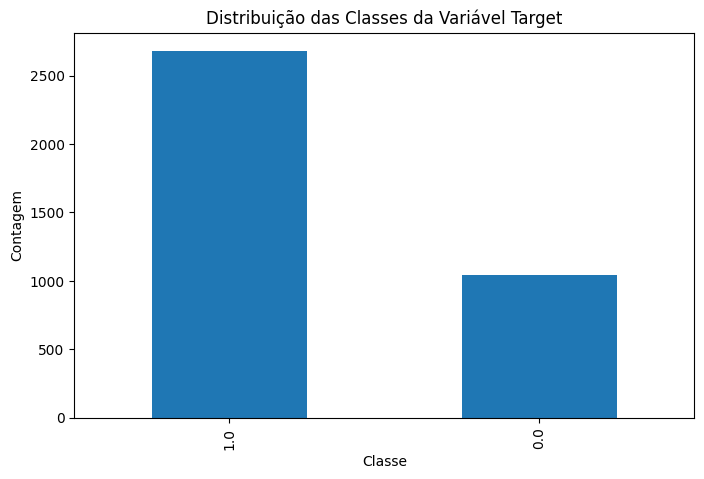

In [ ]:
plt.figure(figsize=(8, 5))
df['Abandono_curso'].value_counts().plot(kind='bar')
plt.title('Distribuição das Classes da Variável Target')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()


In [ ]:
contagem_classes = df['Abandono_curso'].value_counts()
print(contagem_classes)

1.0    2680
0.0    1040
Name: Abandono_curso, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Abandono_curso', axis=1)
y = df['Abandono_curso']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df = pd.DataFrame(X_resampled, columns=X.columns)
df['Abandono_curso'] = y_resampled

In [ ]:
contagem_classes = df['Abandono_curso'].value_counts()
print(contagem_classes)

1.0    2680
0.0    2680
Name: Abandono_curso, dtype: int64


In [ ]:
ordem = ['Abandono_curso', 'Idade', 'Tipo_escola', 'Escolaridade', 'Trabalhando',
       'Estudando', 'Concluiu_EAD', 'Aprender_EAD', 'Disponibilidade_Tutoria',
       'Disponibilidade_3_Meses', 'Pessoas_Casa', 'Renda_Familiar',
       'Horario_Estudando', 'Tablet próprio',
       'Internet wifi', 'Celular compartilhado com outro familiar',
       'Internet 4G', 'Computador', 'Tablet compartilhado',
       'Celular próprio', 'Estados_codificados',
       'Conheceu_PROA_codificado']

df = df[ordem]

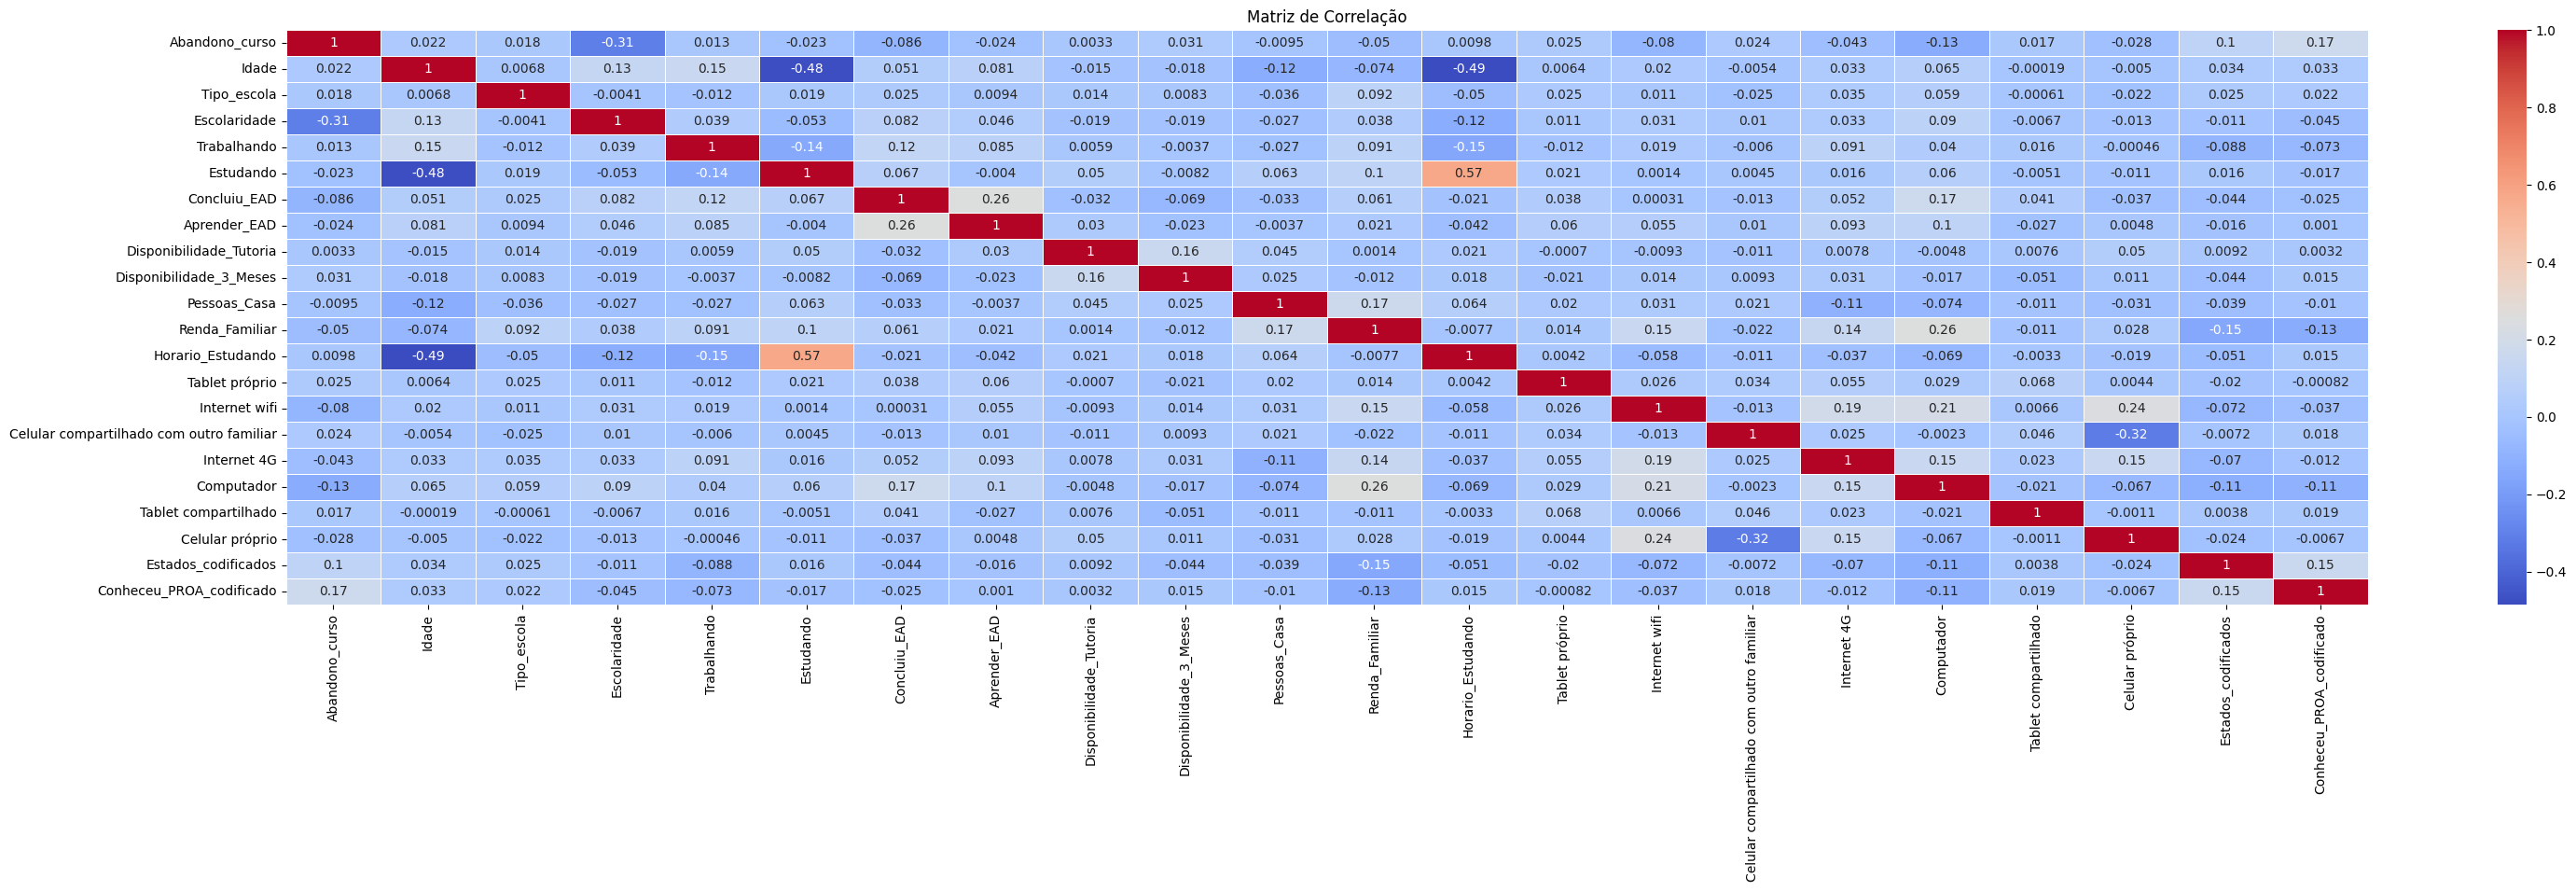

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(36, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
df.columns

Index(['Abandono_curso', 'Idade', 'Tipo_escola', 'Escolaridade', 'Trabalhando',
       'Estudando', 'Concluiu_EAD', 'Aprender_EAD', 'Disponibilidade_Tutoria',
       'Disponibilidade_3_Meses', 'Pessoas_Casa', 'Renda_Familiar',
       'Horario_Estudando', 'Tablet próprio', 'Internet wifi',
       'Celular compartilhado com outro familiar', 'Internet 4G', 'Computador',
       'Tablet compartilhado', 'Celular próprio', 'Estados_codificados',
       'Conheceu_PROA_codificado'],
      dtype='object')

In [ ]:
descarte = ['Idade', 'Tipo_escola', 'Trabalhando',
       'Estudando', 'Aprender_EAD', 'Disponibilidade_Tutoria',
       'Disponibilidade_3_Meses', 'Pessoas_Casa',
       'Horario_Estudando', 'Tablet próprio',
       'Celular compartilhado com outro familiar', 'Internet 4G',
       'Tablet compartilhado', 'Celular próprio']

df = df.drop(columns = descarte, axis=1)
df.head()

,Abandono_curso,Escolaridade,Concluiu_EAD,Renda_Familiar,Internet wifi,Computador,Estados_codificados,Conheceu_PROA_codificado
0,1.0,0.00,0.75,0.4,1.0,1.0,0.000000,0.681159
1,0.0,0.00,0.25,0.2,0.0,1.0,0.979181,0.608696
2,0.0,0.00,0.00,0.0,1.0,0.0,0.000000,0.685990
3,0.0,0.25,0.50,0.2,1.0,1.0,0.000000,0.774500
4,0.0,0.25,0.50,0.2,1.0,1.0,0.979181,0.833333


In [662]:
df.columns

Index(['Abandono_curso', 'Escolaridade', 'Concluiu_EAD', 'Renda_Familiar',
       'Internet wifi', 'Computador', 'Estados_codificados',
       'Conheceu_PROA_codificado'],
      dtype='object')

### Testando modelos

In [ ]:
setup(data=df, target='Abandono_curso')

,Description,Value
0,Session id,4378
1,Target,Abandono_curso
2,Target type,Binary
3,Original data shape,"(5360, 8)"
4,Transformed data shape,"(5360, 8)"
5,Transformed train set shape,"(3751, 8)"
6,Transformed test set shape,"(1609, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8264,0.8725,0.9424,0.7654,0.8446,0.6529,0.6714,0.8510
gbc,Gradient Boosting Classifier,0.8184,0.8705,0.9510,0.7520,0.8398,0.6369,0.6607,0.1860
xgboost,Extreme Gradient Boosting,0.8137,0.8667,0.9083,0.7642,0.8299,0.6273,0.6391,0.1230
rf,Random Forest Classifier,0.7883,0.8462,0.8635,0.7510,0.8032,0.5766,0.5836,0.2630
ada,Ada Boost Classifier,0.7803,0.8438,0.9035,0.7255,0.8042,0.5606,0.5802,0.1270
et,Extra Trees Classifier,0.7673,0.8124,0.8113,0.7465,0.7772,0.5346,0.5372,0.2510
dt,Decision Tree Classifier,0.7641,0.8032,0.7905,0.7512,0.7702,0.5281,0.5291,0.0510
knn,K Neighbors Classifier,0.7049,0.7707,0.8188,0.6674,0.7352,0.4097,0.4209,0.0780
lr,Logistic Regression,0.6668,0.7206,0.7831,0.6356,0.7015,0.3335,0.3432,0.4390
ridge,Ridge Classifier,0.6620,0.0000,0.7777,0.6319,0.6971,0.3239,0.3332,0.0350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4378, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
import pickle

In [691]:
save_model(best_model, model_name='modelo', model_only=True)

Model Successfully Saved


(LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=4378, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 'modelo.pkl')

In [ ]:
df.to_csv('dataset.csv')

In [654]:
import joblib

modelo = joblib.load('modelo.pkl')

In [693]:
df_submissao = pd.read_csv('/Dataset_Resposta_Adjusted.csv')

In [694]:
df_submissao

,Idade,Tipo_escola,Escolaridade,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Horario_Estudando,Tablet próprio,Internet wifi,Celular compartilhado com outro familiar,Internet 4G,Computador,Tablet compartilhado,Celular próprio
0,0.307692,0.0,0.00,0.0,0.0,1.0,1.000000,1.0,0.0,0.2,0.0,0.00,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.076923,0.0,0.00,0.0,1.0,0.5,0.666667,1.0,0.0,0.6,0.2,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.230769,0.0,0.00,0.0,1.0,1.0,0.666667,1.0,0.0,0.2,0.6,0.00,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.076923,0.0,0.00,0.0,1.0,1.0,1.000000,1.0,0.0,0.2,0.0,0.25,0.0,1.0,0.0,1.0,1.0,0.0,1.0
4,0.384615,0.0,0.25,0.0,0.0,0.0,0.333333,1.0,0.0,0.1,0.4,0.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,0.230769,0.0,0.00,0.0,1.0,0.5,1.000000,1.0,0.0,0.3,0.0,0.25,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1590,0.153846,0.0,0.00,0.0,0.0,0.5,1.000000,1.0,0.0,0.3,0.2,0.00,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1591,0.461538,0.0,0.00,0.0,0.0,1.0,1.000000,1.0,0.0,0.3,0.4,0.00,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1592,0.230769,0.0,0.00,0.0,1.0,0.0,1.000000,1.0,0.0,0.3,0.0,0.00,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [695]:
df_submissao.columns

Index(['Idade', 'Tipo_escola', 'Escolaridade', 'Trabalhando', 'Estudando',
       'Concluiu_EAD', 'Aprender_EAD', 'Disponibilidade_Tutoria',
       'Disponibilidade_3_Meses', 'Pessoas_Casa', 'Renda_Familiar',
       'Horario_Estudando', 'Tablet próprio', 'Internet wifi',
       'Celular compartilhado com outro familiar', 'Internet 4G', 'Computador',
       'Tablet compartilhado', 'Celular próprio'],
      dtype='object')

In [696]:
df.columns

Index(['Abandono_curso', 'Escolaridade', 'Concluiu_EAD', 'Renda_Familiar',
       'Internet wifi', 'Computador', 'Estados_codificados',
       'Conheceu_PROA_codificado'],
      dtype='object')

In [697]:
df.head()

,Abandono_curso,Escolaridade,Concluiu_EAD,Renda_Familiar,Internet wifi,Computador,Estados_codificados,Conheceu_PROA_codificado
0,1.0,0.00,0.75,0.4,1.0,1.0,0.000000,0.681159
1,0.0,0.00,0.25,0.2,0.0,1.0,0.979181,0.608696
2,0.0,0.00,0.00,0.0,1.0,0.0,0.000000,0.685990
3,0.0,0.25,0.50,0.2,1.0,1.0,0.000000,0.774500
4,0.0,0.25,0.50,0.2,1.0,1.0,0.979181,0.833333


In [699]:
y_pred = modelo.predict(df_submissao)

ValueError: ignored

In [692]:
import pandas as pd
import pickle
import lightgbm

# Carregar o modelo
with open("/content/modelo.pkl", "rb") as file:
    model = pickle.load(file)

# Carregar o Dataset_Resposta
dataset_resposta = pd.read_csv('/Dataset_Resposta_Processed.csv')

# Aqui, você deve realizar qualquer pré-processamento necessário no dataset_resposta antes de fazer previsões.
# Por exemplo, se o modelo foi treinado com dados codificados ou escalonados, você deve aplicar as mesmas transformações aqui.
# Se o modelo espera certas características, certifique-se de que elas estejam presentes em dataset_resposta.

# Fazer previsões
predictions = model.predict(dataset_resposta)

# Carregar o arquivo Sample_Submission.csv
sample_submission = pd.read_csv("Sample_Submission.csv")

# Supondo que o arquivo Sample_Submission.csv tenha uma coluna chamada "Predictions" (ou algo semelhante) onde queremos preencher as previsões:
sample_submission["Predictions"] = predictions

# Salvar o arquivo atualizado
sample_submission.to_csv("Updated_Sample_Submission.csv", index=False)

UnpicklingError: ignored